# Milestone 1
* This is a preliminary milestone to let you set up goals for your final project and assess the feasibility of your ideas. Please, fill the following sections about your project. (max. 2000 characters per section)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
sns.set(color_codes=True)

In [3]:
''' Comment this if not using Google Colab '''
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


## Dataset


* Find a dataset (or multiple) that you will explore. Assess the quality of the data it contains and how much preprocessing / data-cleaning it will require before tackling visualization. We recommend using a standard dataset as this course is not about scraping nor data processing.

## Problematic

* Frame the general topic of your visualization and the main axis that you want to develop.

  * What am I trying to show with my visualization?
  * Think of an overview for the project, your motivation, and the target audience.

## Exploratory Data Analysis

* Pre-processing of the data set you chose:

  * Show some basic statistics and get insights about the data

In [0]:
# Import data for Google Colab
df_stats = pd.read_csv('drive/My Drive/pokemon/dataset_stats.csv') 
df_abilities = pd.read_csv('drive/My Drive/pokemon/dataset_abilities.csv')
df = pd.read_csv('drive/My Drive/pokemon/first6gens.csv')

In [0]:
# Import data for Jupyter Lab
df = pd.read_csv('data/first6gens.csv')
df_abilities = pd.read_csv('data/dataset_abilities.csv')

In [402]:
df.shape

(721, 44)

In [403]:
df.columns

Index(['pokedex_number', 'name', 'type1', 'type2', 'hp', 'defense', 'attack',
       'sp_defense', 'sp_attack', 'speed', 'base_total', 'capture_rate',
       'base_happiness', 'experience_growth', 'height_m', 'weight_kg',
       'percentage_male', 'is_legendary', 'generation', 'classfication',
       'Color', 'Body_Style', 'hasMegaEvolution', 'Egg_Group_1', 'Egg_Group_2',
       'base_egg_steps', 'against_bug', 'against_dark', 'against_dragon',
       'against_electric', 'against_fairy', 'against_fight', 'against_fire',
       'against_flying', 'against_ghost', 'against_grass', 'against_ground',
       'against_ice', 'against_normal', 'against_poison', 'against_psychic',
       'against_rock', 'against_steel', 'against_water'],
      dtype='object')

There are 721 pokemon with 44 features in our dataset, which includes the first 6 generations of Pokemon.

#### Some useful plot functions for modularity

In [0]:
# Plots basic histogram 
def plot_hist(df, var):
  df[var] = pd.Series(df[var], name=var)
  ax = sns.distplot(df[var]);
  ax.set_title(str(var) + ' distribution over all generations')
  ax.set_ylabel('percentage')

In [0]:
# Plots groupby_var-wise LINE histogram of a given 'var' wrt a given 'groupby_var' 
# e.g. var: 'attack', groupby_var: 'generation; --> attack distribution over generations
def plot_grouped_line_hist(df, var, groupby_var):
  df_var = df.groupby([groupby_var,var])['name'].count().to_frame().reset_index()
  df_var = df_var.rename(columns={"name":"count"})
  plt.figure(figsize=(13,7))
  ax = sns.lineplot(x=var, y="count",hue=groupby_var,palette=sns.color_palette("husl", 6),
                    data=df_var)
  ttl=plt.title(str(var) + ' distribution over ' + str(groupby_var))

In [0]:
# Plots groupby_var-wise BOX histogram of a given 'var' wrt a given 'groupby_var' 
# e.g. var: 'attack', groupby_var: 'generation; --> attack distribution over generations
def plot_grouped_box_hist(df, var, groupby_var):
  fig,ax = plt.subplots() # can add figsize=(13,7) as a parameter if needed
  hatches = ('','','','','',',') # fill pattern
  for (i, d),hatch in zip(df.groupby(groupby_var), hatches):
      fig=d[var].hist(alpha=0.7,bins=7, ax=ax, label= str(groupby_var) + ' ' + str(i), hatch=hatch)
  lg = ax.legend()
  lbl = ax.set(xlabel=var, ylabel='count')
  ttl=plt.title(str(var) + ' distribution over ' + str(groupby_var))

In [0]:
# Plots the evolution of a given variable's median throughout generations
def plot_med_growth_evol(var):
  med_growth_evol= df2.groupby('generation')[var].median().to_frame().reset_index()
  plt.title('median evolution of ' + str(var) + ' over generation')
  ax = sns.lineplot(x="generation", y=var, data=med_growth_evol)

In [0]:
# Plots a scatterplot for 2 given variables
def two_var_scatter(xvar, yvar):
  plt.figure(figsize=(8,5))
  sns.scatterplot(x=xvar, y=yvar, data=df2, hue="generation", palette="Set1")
  ttl=plt.title(str(xvar) + ' vs. ' + str(yvar) + ' by generations')

### Feature-group 1
1. If any of your features need preprocessing, preprocess it. 

2. Plot the distribution (i.e. histogram / bar chart ) of each feature. 

3. Plot scatterplots between meaningful pairs of features to identify any possible correlation. Also compute the correlation coefficients (Pearson and Spearman). 

4. Also consider any possible correlations that could occur between your set of features and the features from other groups.

5. EXPLAIN WHY FOR EACH OF THESE COMPUTATIONS

	•	percentage_male: The percentage of the species that are male. Blank if the Pokemon is genderless.
	•	type1: The Primary Type of the Pokemon
	•	type2: The Secondary Type of the Pokemon
	•	classification: The Classification of the Pokemon as described by the Sun and Moon Pokedex
	•	height_m: Height of the Pokemon in metres
	•	weight_kg: The Weight of the Pokemon in kilograms
	•	capture_rate: Capture Rate of the Pokemon
	•	abilities: A stringified list of abilities that the Pokemon is capable of having
	•	experience_growth: The Experience Growth of the Pokemon

#### Preprocessing group 1 / preliminary informations

In [0]:
selected_ = ['pokedex_number','name','type1', 'type2','classfication',\
            'height_m', 'weight_kg','capture_rate',
            'experience_growth','generation']
df = df[selected_]
df_abilities = df_abilities[['pokedex_number','name','abilities','generation']]
df_abilities = df_abilities[df_abilities.generation < 7] # keeping first 6 generations 

In [0]:
df_groupe1 = pd.merge(df, df_abilities, how='left', on=['pokedex_number','name','generation'])

In [0]:
df_groupe1.head()

,pokedex_number,name,type1,type2,classfication,height_m,weight_kg,capture_rate,experience_growth,generation,abilities
0,1,Bulbasaur,grass,poison,Seed Pokémon,0.7,6.9,45,1059860,1,"['Overgrow', 'Chlorophyll']"
1,2,Ivysaur,grass,poison,Seed Pokémon,1.0,13.0,45,1059860,1,"['Overgrow', 'Chlorophyll']"
2,3,Venusaur,grass,poison,Seed Pokémon,2.0,100.0,45,1059860,1,"['Overgrow', 'Chlorophyll']"
3,4,Charmander,fire,NaN,Lizard Pokémon,0.6,8.5,45,1059860,1,"['Blaze', 'Solar Power']"
4,5,Charmeleon,fire,NaN,Flame Pokémon,1.1,19.0,45,1059860,1,"['Blaze', 'Solar Power']"


In [0]:
print("total null values: ", df_groupe1.isna().sum().sum())

total null values:  393


In [0]:
df_groupe1.loc[:, df_groupe1.isna().any()]

,type2,height_m,weight_kg
0,poison,0.7,6.9
1,poison,1.0,13.0
2,poison,2.0,100.0
3,NaN,0.6,8.5
4,NaN,1.1,19.0
...,...,...,...
716,flying,5.8,203.0
717,ground,5.0,284.6
718,fairy,0.7,8.8
719,ghost,NaN,NaN


In [0]:
df_groupe1[df_groupe1.height_m.isna()].shape

(19, 11)

In [0]:
print("missing height and weight : ",19 )

missing height and weight :  19


In [0]:
df_groupe1[df_groupe1.type2.isna()].shape

(355, 11)

In [0]:
print("pokemons with one type : ",355 )

pokemons with one type :  355


In [0]:
df_groupe1['height_m'] = df_groupe1['height_m'].fillna(0)
df_groupe1['weight_kg'] = df_groupe1['weight_kg'].fillna(0)

In [0]:
pd.concat([df_groupe1.min().rename('min'), df_groupe1.max().rename('max')], axis=1)

,min,max
pokedex_number,1,721
name,Abomasnow,Zygarde
type1,bug,water
classfication,Abundance Pokémon,Zen Charm Pokémon
height_m,0,14.5
weight_kg,0,950
capture_rate,3,255
experience_growth,600000,1640000
generation,1,6
abilities,"['Adaptability', 'Download', 'Analytic']","['Wonder Skin ', 'Magic Guard', 'Tinted Lens']"


In [0]:
#stripping strings out of list of string
df_groupe1.abilities=df_groupe1.abilities.apply(lambda x: x.strip("[]").replace('\'','')\
                                        .split(", "))

#### Distribution plots group 1 
For the moment i plot distribution in everry possible way, i'll filter after depending on the relevence


First the continues variables then categorical ones

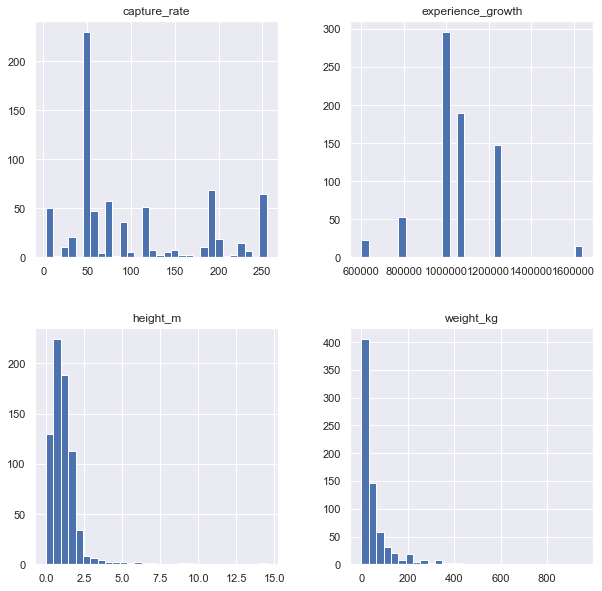

In [0]:
#distribution of continuous variables
fig = df_groupe1[['height_m','weight_kg','capture_rate','experience_growth']]\
.hist(figsize=(10,10), bins= 30)


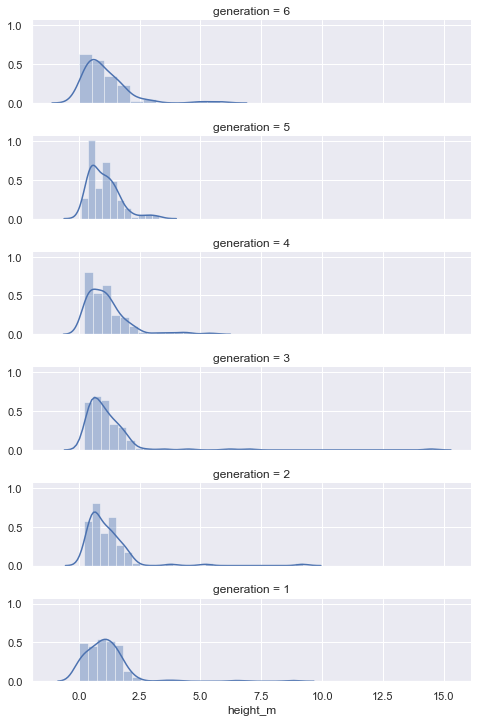

In [0]:
# Height distribution per generation 
ordered_days = df_groupe1.generation.value_counts().sort_index(ascending=False).index
g = sns.FacetGrid(df_groupe1, row="generation", row_order=ordered_days,
                  height=1.7, aspect=4)
g.map(sns.distplot, "height_m", hist=True, rug=False);

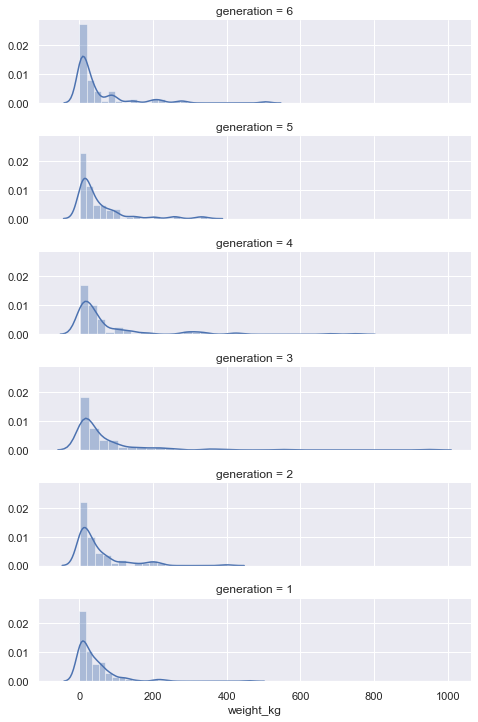

In [0]:
#weight  distribution per generation 
ordered_days =df_groupe1.generation.value_counts().sort_index(ascending=False).index
g = sns.FacetGrid(df_groupe1, row="generation", row_order=ordered_days,
                  height=1.7, aspect=4)
g.map(sns.distplot, "weight_kg", hist=True, rug=False);

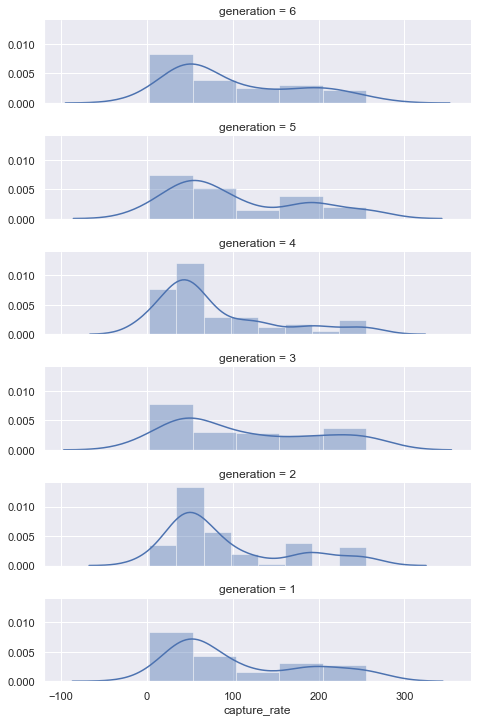

In [0]:
#capture rate distribution per generation 
ordered_days = df_groupe1.generation.value_counts().sort_index(ascending=False).index
g = sns.FacetGrid(df_groupe1, row="generation", row_order=ordered_days,
                  height=1.7, aspect=4)
g.map(sns.distplot, "capture_rate", hist=True, rug=False);

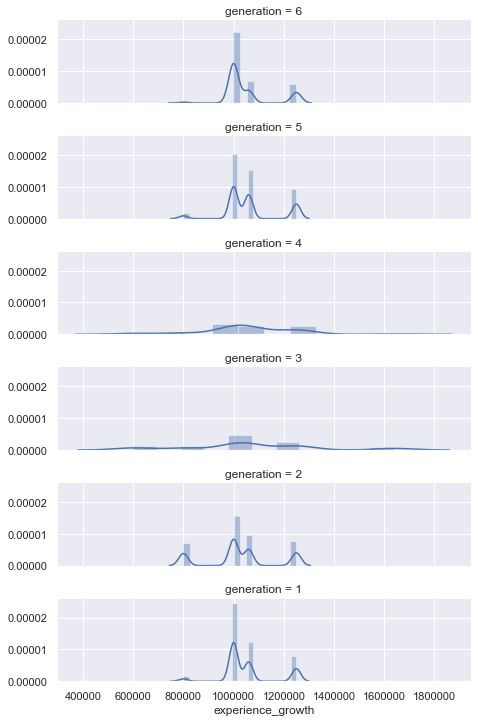

In [0]:
#growth experience distribution per generation 
ordered_days =df_groupe1.generation.value_counts().sort_index(ascending=False).index
g = sns.FacetGrid(df_groupe1, row="generation", row_order=ordered_days,
                  height=1.7, aspect=4)
g.map(sns.distplot, "experience_growth", hist=True, rug=False);

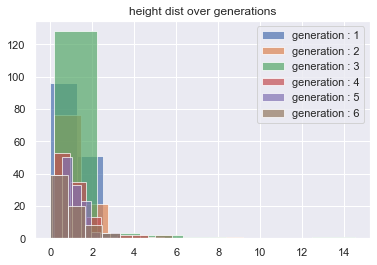

In [0]:
fig,ax = plt.subplots()

hatches = ('','','','','',',')         # fill pattern
for (i, d),hatch in zip(df_groupe1.groupby('generation'), hatches):
    fig=d['height_m'].hist(alpha=0.7,bins=7, ax=ax, label='generation : '+str(i), hatch=hatch)
lg =ax.legend()
ttl=plt.title('height dist over generations')

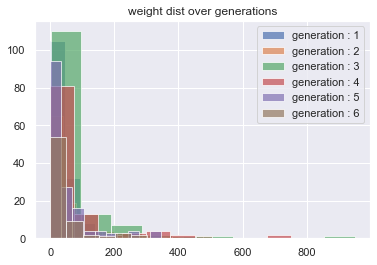

In [0]:
fig,ax = plt.subplots()

hatches = ('','','','','',',')         # fill pattern
for (i, d),hatch in zip(df_groupe1.groupby('generation'), hatches):
    fig=d['weight_kg'].hist(alpha=0.7, ax=ax,bins=10,label='generation : '+str(i), hatch=hatch)
lg =ax.legend()
ttl=plt.title('weight dist over generations')

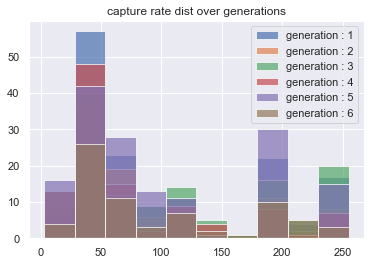

In [0]:
fig,ax = plt.subplots()

hatches = ('','','','','',',')         # fill pattern
for (i, d),hatch in zip(df_groupe1.groupby('generation'), hatches):
    fig=d['capture_rate'].hist(alpha=0.7, ax=ax, label='generation : '+str(i), hatch=hatch)
lg =ax.legend()
ttl=plt.title('capture rate dist over generations')

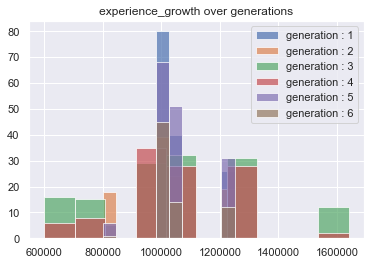

In [0]:
fig,ax = plt.subplots()

hatches = ('','','','','',',')         # fill pattern
for (i, d),hatch in zip(df_groupe1.groupby('generation'), hatches):
    fig=d['experience_growth'].hist(alpha=0.7, ax=ax, label='generation : '+str(i), hatch=hatch)
lg =ax.legend()
ttl=plt.title('experience_growth over generations')

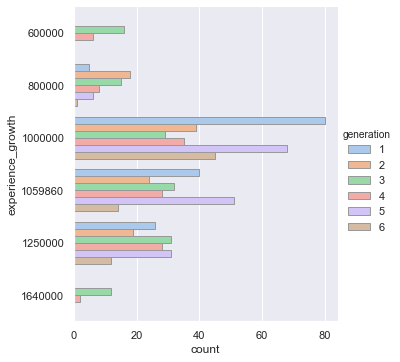

In [0]:
sns.catplot(y="experience_growth", hue="generation", kind="count",
            palette="pastel", edgecolor=".6",
            data=df_groupe1);

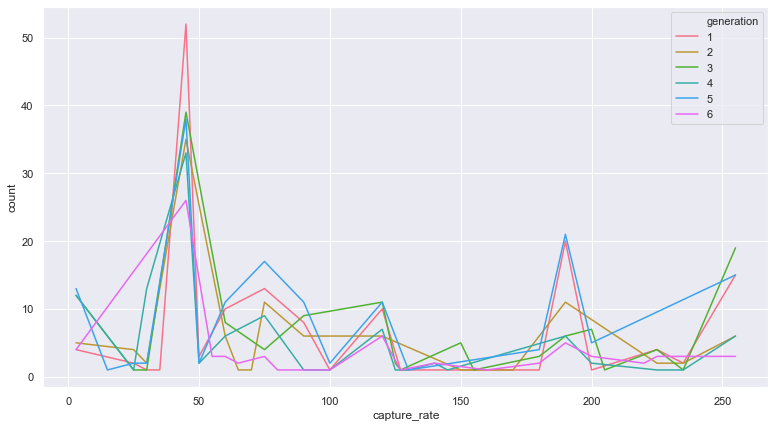

In [0]:

## other way of seeing distribution 

med_growth_evol= df_groupe1.groupby(['generation','capture_rate'])['name'].count()\
                              .to_frame().reset_index()
                                                   
med_growth_evol=med_growth_evol.rename(columns={"name":"count"})
plt.figure(figsize=(13,7))
ax = sns.lineplot(x="capture_rate", y="count",hue='generation',palette=sns.color_palette("husl", 6),
                   data=med_growth_evol)

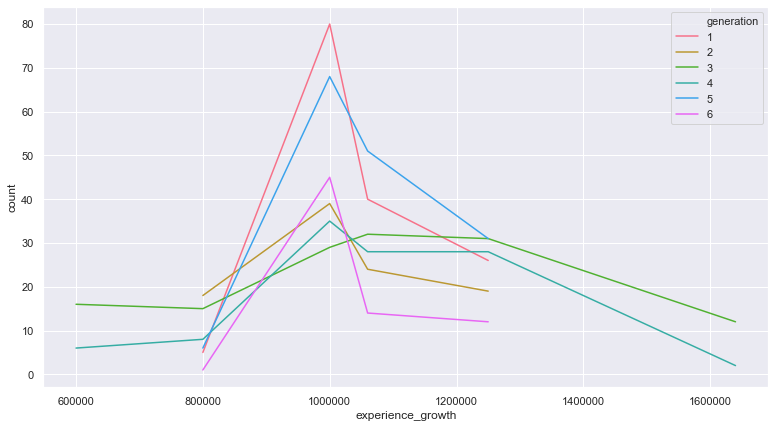

In [0]:
## other way of seeing distribution 

med_growth_evol= df_groupe1.groupby(['generation','experience_growth'])['name'].count()\
                              .to_frame().reset_index()
                                                   
med_growth_evol=med_growth_evol.rename(columns={"name":"count"})
plt.figure(figsize=(13,7))
ax = sns.lineplot(x="experience_growth", y="count",hue='generation',palette=sns.color_palette("husl", 6),
                   data=med_growth_evol)

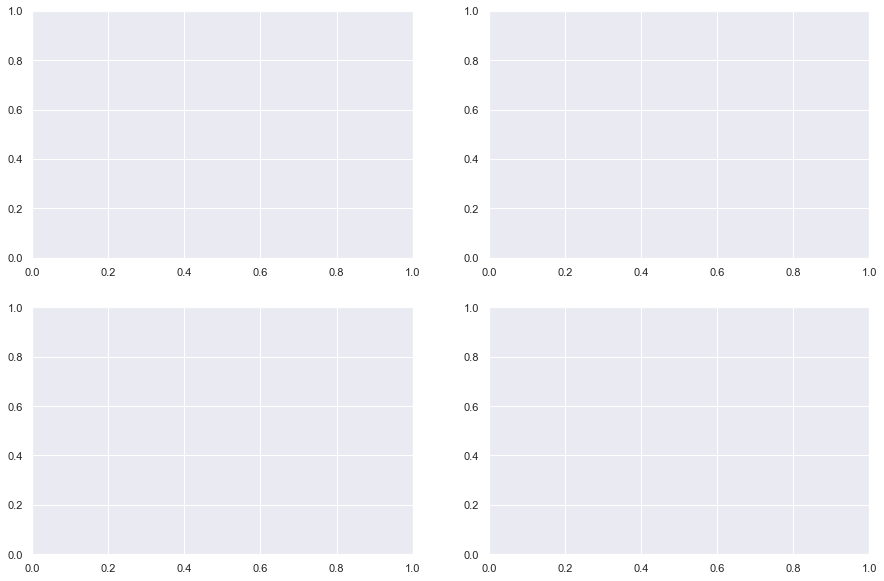

In [0]:
fig, axes = plt.subplots(ncols=2, nrows=2,figsize=(15, 10))
list_=['height_m', 'weight_kg', 'capture_rate','experience_growth']
for i, ax in zip(range(4), axes.flat):
    sns.catplot(x="generation", y=list_[i], kind="box",ax=ax,orient='v', data=df_groupe1)
    plt.close()

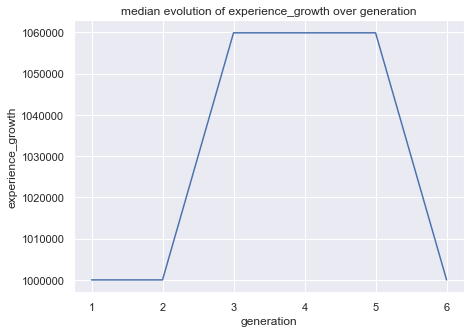

In [0]:
med_growth_evol= df_groupe1.groupby('generation')['experience_growth'].median()\
                              .to_frame().reset_index()
                                                   

plt.figure(figsize=(7,5))
plt.title('median evolution of experience_growth over generation')
ax = sns.lineplot(x="generation", y="experience_growth",
                   data=med_growth_evol)

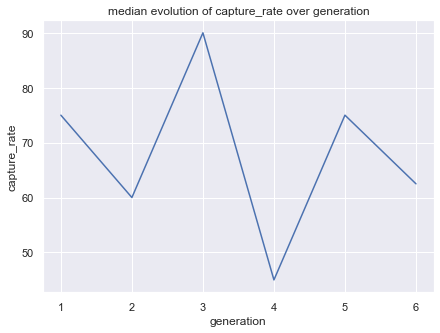

In [0]:
med_growth_evol= df_groupe1.groupby('generation')['capture_rate'].median()\
                              .to_frame().reset_index()
                                                   

plt.figure(figsize=(7,5))
plt.title('median evolution of capture_rate over generation')
ax = sns.lineplot(x="generation", y="capture_rate",data=med_growth_evol)

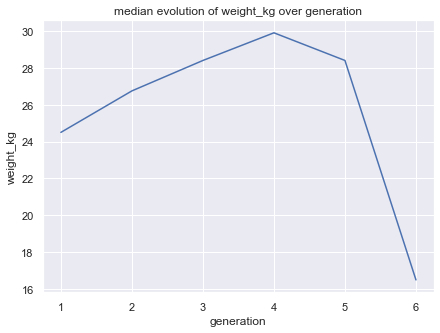

In [0]:
med_growth_evol= df_groupe1.groupby('generation')['weight_kg'].median()\
                              .to_frame().reset_index()
                                                   

plt.figure(figsize=(7,5))
plt.title('median evolution of weight_kg over generation')
ax = sns.lineplot(x="generation", y="weight_kg",data=med_growth_evol)

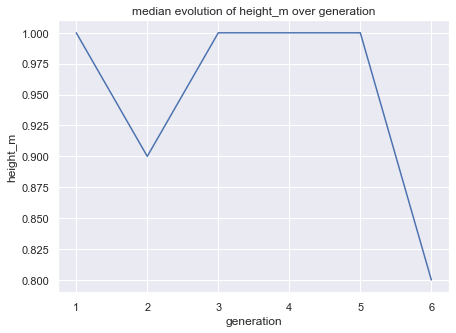

In [0]:
med_growth_evol= df_groupe1.groupby('generation')['height_m'].median()\
                              .to_frame().reset_index()
                                                   

plt.figure(figsize=(7,5))
plt.title('median evolution of height_m over generation')
ax = sns.lineplot(x="generation", y="height_m",data=med_growth_evol)

In [0]:
#most present abilities all generation together 
df_groupe1.abilities.explode().value_counts().sort_values(ascending=False).to_frame()\
                              

,abilities
Sturdy,39
Swift Swim,38
Chlorophyll,35
Levitate,32
Keen Eye,31
...,...
Stance Change,1
Multitype,1
Air Lock,1
Pixilate,1


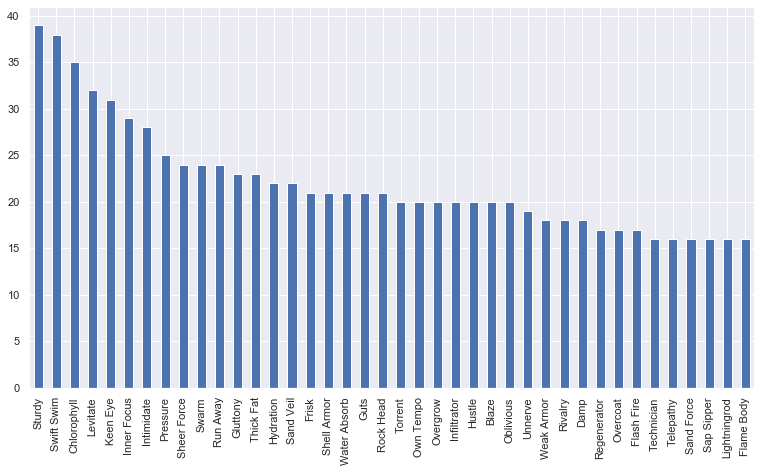

In [0]:
plt.figure(figsize=(13,7))

plot=df_groupe1.abilities.explode().value_counts().sort_values(ascending=False)[:40]\
    .plot(kind='bar')



In [0]:
#most present abilities all generation together 
top_abs=df_groupe1.groupby('generation')['abilities'].apply(lambda x: x.explode())\
                                             .to_frame().count(level='generation')\
                                             .reset_index()
                                            
top_abs.head()                                  

,generation,abilities
0,1,438
1,2,261
2,3,309
3,4,246
4,5,400


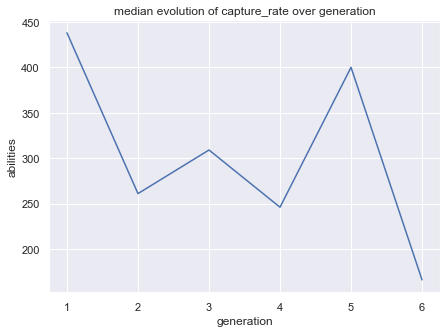

In [0]:
plt.figure(figsize=(7,5))
plt.title('median evolution of capture_rate over generation')
ax = sns.lineplot(x="generation", y="abilities",data=top_abs)

In [0]:
#most present abilities generation wise
abs_gen=df_groupe1.groupby('generation')['abilities'].apply(lambda x: x.explode())\
                                            .to_frame().reset_index()\
                                            .rename(columns={'level_1':'pokedex_numbder'})\
                                            .groupby('generation')['abilities']\
                                            .value_counts().sort_values(ascending=False)\
                                            .to_frame()\
                                            .rename(columns={'abilities':'count'})\
                                            .reset_index()
abs_gen.head()
                                            


,generation,abilities,count
0,1,Swift Swim,13
1,1,Chlorophyll,12
2,5,Swarm,12
3,1,Inner Focus,11
4,1,Run Away,11


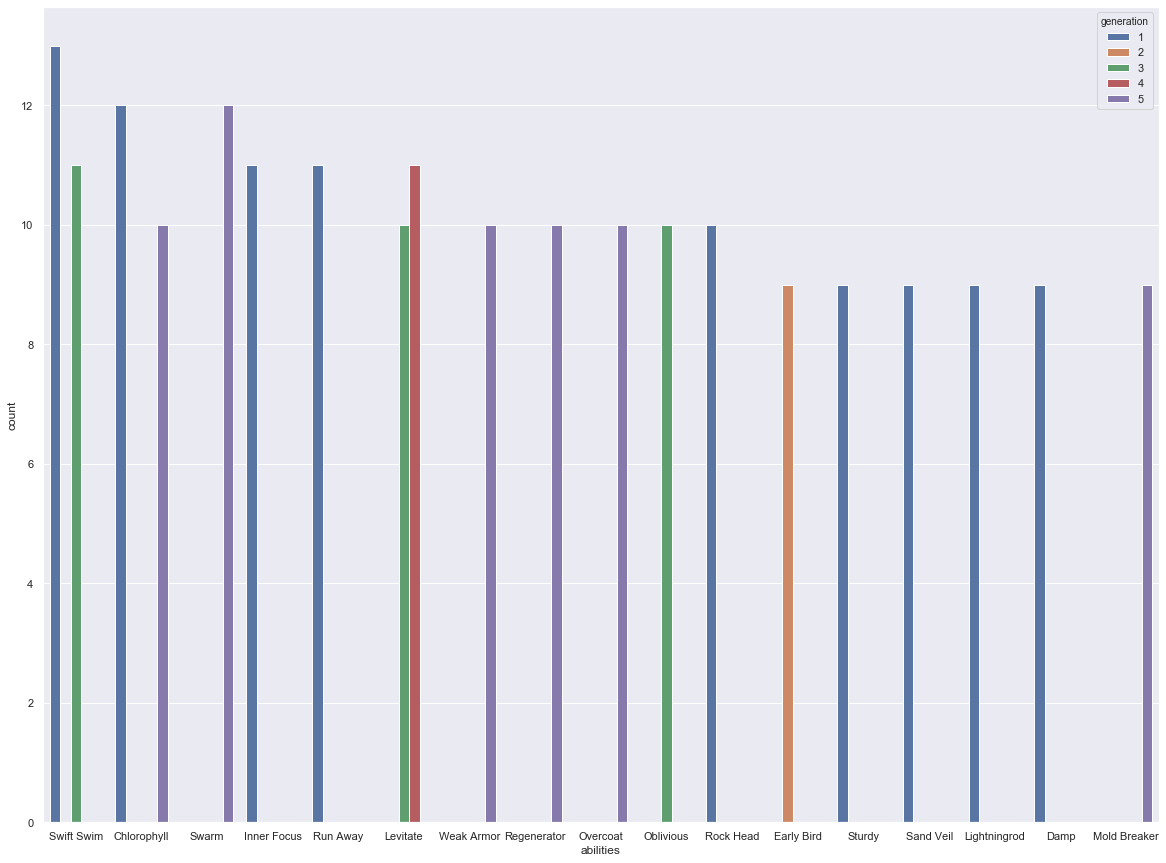

In [0]:
plt.figure(figsize=(20,15))
ax = sns.barplot(x="abilities", y="count", hue="generation", data=abs_gen[:20])



In [0]:
all_classes=set(df_groupe1['type1']).union(set(df_groupe1['type2']))
all_classes.remove(np.nan)
print(all_classes)

{'bug', 'ice', 'fairy', 'grass', 'poison', 'ghost', 'electric', 'steel', 'fighting', 'flying', 'psychic', 'dark', 'water', 'fire', 'ground', 'dragon', 'normal', 'rock'}


In [0]:
df_groupe1["types"]= df_groupe1.applymap(lambda x: x)\
                                .apply(lambda x: [x.type1,x.type2], axis=1)



In [0]:
#most present abilities all generation together 
types = df_groupe1.types.explode().value_counts().sort_values(ascending=False)\
                    .to_frame()
types.head()

,types
water,118
normal,97
flying,90
grass,85
psychic,74


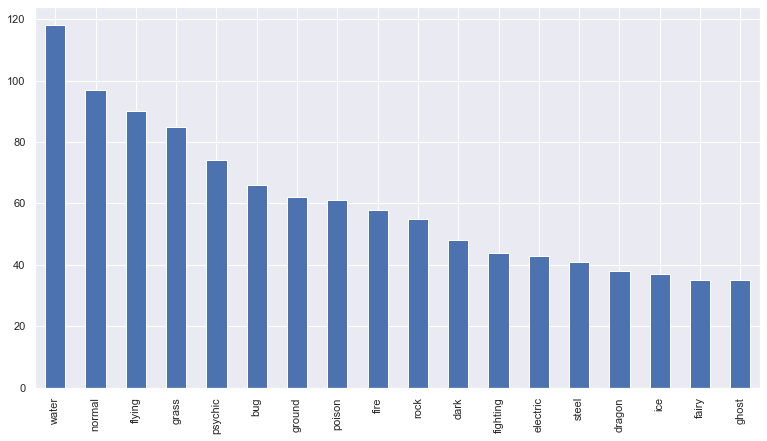

In [0]:
plt.figure(figsize=(13,7))

plot=df_groupe1.types.explode().value_counts().sort_values(ascending=False)[:40]\
    .plot(kind='bar')



In [0]:
plt.figure(figsize=(20,15))
ax = sns.barplot(x="types", y="count", hue="generation", data=types_gens)


NameError: name 'types_gens' is not defined

<Figure size 1440x1080 with 0 Axes>

In [0]:
types_gens[types_gens.generation==1]

In [0]:

types_gens=df_groupe1.groupby('generation')['types'].apply(lambda x: x.explode())\
                                            .to_frame().reset_index()\
                                            .rename(columns={'level_1':'pokedex_numbder'})\
                                            .groupby('generation')['types']\
                                            .value_counts().sort_values(ascending=False)\
                                            .to_frame()\
                                            .rename(columns={'types':'count'})\
                                            .reset_index()
                                            
types_gens.head()
                                            

In [0]:

#need fixing for x axis 
ordered_days = types_gens.generation.value_counts().sort_index(ascending=False).index
g = sns.FacetGrid(types_gens, row="generation", row_order=ordered_days,
                  height=1.7, aspect=7)
g.map(sns.barplot,"types","count");

### Feature-group 2



	•	against_?: Eighteen features that denote the amount of damage taken against an attack of a particular type
	•	hp: The Base HP of the Pokemon
	•	attack: The Base Attack of the Pokemon
	•	defense: The Base Defense of the Pokemon
	•	sp_attack: The Base Special Attack of the Pokemon
	•	sp_defense: The Base Special Defense of the Pokemon
	•	speed: The Base Speed of the Pokemon
	•	is_legendary: Denotes if the Pokemon is legendary.
	•	Total. Sum of all the base stats (Health Points, Attack, Defense, Special Attack, Special Defense, and Speed).

#### Preprocessing Group 2 / Preliminary Information

Next, we look at hp, attack, defense, sp_attack, sp_defense, speed, is_legendary, and base_total features of our pokemon.

In [11]:
# Creating a smaller dataframe for printing
selected_2 = ['pokedex_number','name','hp','attack','defense','sp_attack',\
             'sp_defense','speed','is_legendary','base_total','generation']
df2 = df[selected_2]
df2.head()

,pokedex_number,name,hp,attack,defense,sp_attack,sp_defense,speed,is_legendary,base_total,generation
0,1,Bulbasaur,45,49,49,65,65,45,0,318,1
1,2,Ivysaur,60,62,63,80,80,60,0,405,1
2,3,Venusaur,80,100,123,122,120,80,0,625,1
3,4,Charmander,39,52,43,60,50,65,0,309,1
4,5,Charmeleon,58,64,58,80,65,80,0,405,1


In [0]:
# Separate dataframe for each generation
gen1 = df[df['generation']==1]
gen2 = df[df['generation']==2]
gen3 = df[df['generation']==3]
gen4 = df[df['generation']==4]
gen5 = df[df['generation']==5]
gen6 = df[df['generation']==6]

In [0]:
# Plots side-by-side generation-wise histogram
def plot_sidebyside_hist(var):
  n_bins = 7
  x = gen1[var], gen2[var], gen3[var], gen4[var], gen5[var], gen6[var]
  colors = ['orangered','dodgerblue','orange','forestgreen','blueviolet','deeppink']
  labels = ['Gen 1', 'Gen 2', 'Gen 3', 'Gen 4', 'Gen 5', 'Gen 6']
  plt.hist(x, n_bins, density=True, histtype='bar', color=colors, label=labels)
  plt.legend(prop={'size': 12})
  plt.suptitle('generation-wise ' + str(var) + ' distribution', fontsize=12)
  plt.xlabel(var)
  plt.ylabel('rate')

#### Distributions of continuous variables

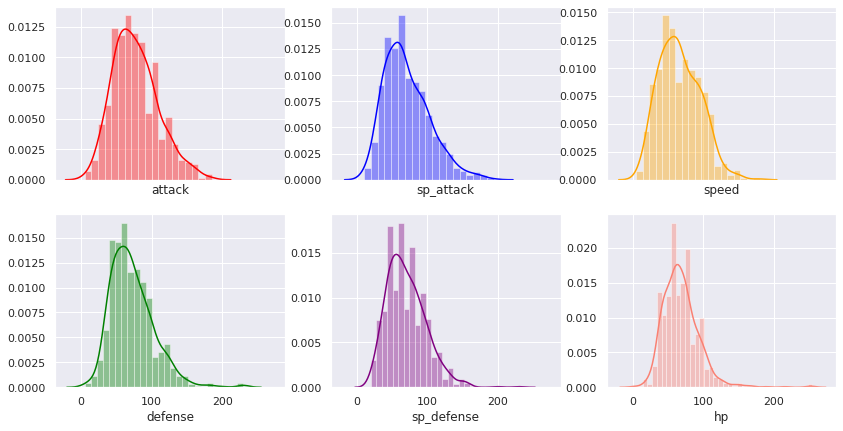

In [14]:
# Overlook of features attack, sp_attack, speed, defense, sp_defense, and hp for all generations
f, axes = plt.subplots(2, 3, figsize=(14, 7), sharex=True)
sns.distplot( df['attack'] , color="red", ax=axes[0, 0])
sns.distplot( df['sp_attack'] , color="blue", ax=axes[0, 1])
sns.distplot( df['speed'] , color="orange", ax=axes[0, 2])
sns.distplot( df['defense'] , color="green", ax=axes[1, 0])
sns.distplot( df['sp_defense'] , color="purple", ax=axes[1, 1])
sns.distplot( df['hp'] , color="salmon", ax=axes[1, 2]);

When we plot the distributions of our continous variables above, we observe a slightly right-skewed distribution for all of them, meaning the median values are lower than the mean values for all of these features. 

#### Scatterplots and Correlations

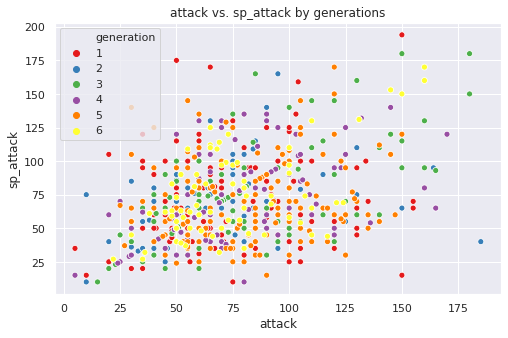

In [15]:
two_var_scatter('attack', 'sp_attack')

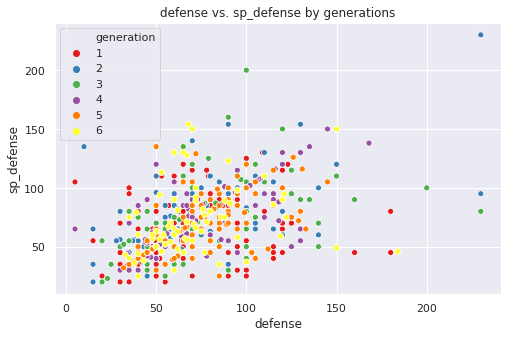

In [16]:
two_var_scatter('defense', 'sp_defense')

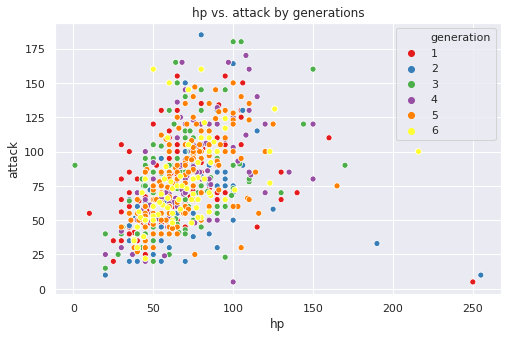

In [17]:
two_var_scatter('hp', 'attack')

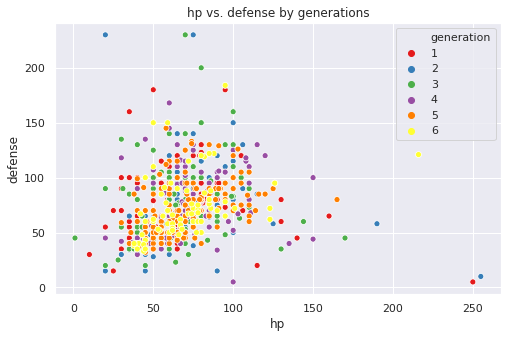

In [18]:
two_var_scatter('hp', 'defense')

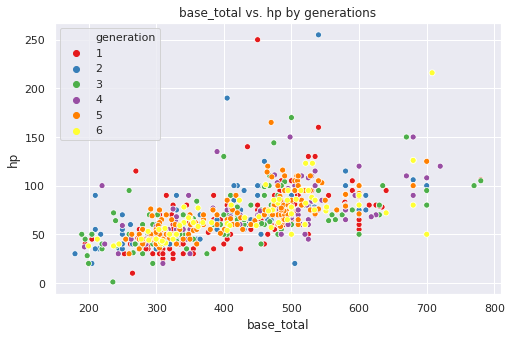

In [19]:
two_var_scatter('base_total', 'hp')

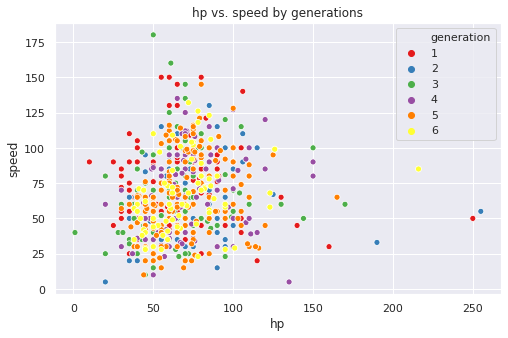

In [20]:
two_var_scatter('hp', 'speed')

In [21]:
df2.corr()

,pokedex_number,hp,attack,defense,sp_attack,sp_defense,speed,is_legendary,base_total,generation
pokedex_number,1.000000,0.116943,0.122204,0.087044,0.105306,0.077046,0.018676,0.146799,0.131916,0.983329
hp,0.116943,1.000000,0.401039,0.243418,0.358457,0.385799,0.162828,0.295936,0.617114,0.080809
attack,0.122204,0.401039,1.000000,0.468690,0.378165,0.279342,0.358851,0.307070,0.731881,0.078821
defense,0.087044,0.243418,0.468690,1.000000,0.240444,0.509580,0.022493,0.271287,0.626390,0.034129
sp_attack,0.105306,0.358457,0.378165,0.240444,1.000000,0.521462,0.452065,0.410710,0.742750,0.060629
sp_defense,0.077046,0.385799,0.279342,0.509580,0.521462,1.000000,0.261270,0.373593,0.727730,0.021245
speed,0.018676,0.162828,0.358851,0.022493,0.452065,0.261270,1.000000,0.317104,0.562796,-0.006134
is_legendary,0.146799,0.295936,0.307070,0.271287,0.410710,0.373593,0.317104,1.000000,0.492076,0.076030
base_total,0.131916,0.617114,0.731881,0.626390,0.742750,0.727730,0.562796,0.492076,1.000000,0.067619
generation,0.983329,0.080809,0.078821,0.034129,0.060629,0.021245,-0.006134,0.076030,0.067619,1.000000


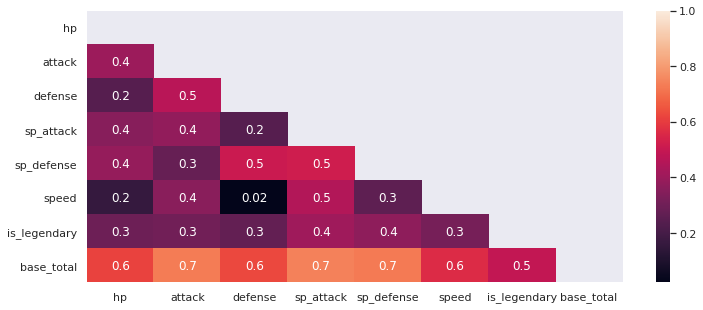

In [22]:
df_heat = df2.drop(columns=['pokedex_number', 'generation'])
matrix = np.triu(df_heat.corr())
plt.figure(figsize = (12,5))
ax = sns.heatmap(df_heat.corr(), mask=matrix, annot=True, fmt='.1g');

We observe a moderate positive correlation between total base stats of a pokemon and it being a legendary pokemon. This finding makes sense since legendary pokemon have overall better stats. Out of all the features, special attack and special defense features stand out in legendary pokemon. We observe that they have the highest correlation (0.4) out of any stats apart from base_total.

There is a moderate positive correlation between defense and attack, as well as between sp_defense, sp_attack, and defense.

In addition, a higher hp usually means higher attack, sp_attack, and sp_defense. This makes sense because pokemon get higher hp as they evolve and advance. With that, their hp increases along with their other stats.

Moreover, total base stats of a pokemon correlate with its other stats since it is a composed version of the pokemon's overall stats.

#### HP

In [0]:
# Generation-wise distributions looks too cluttered when visualized with a line histogram
# plot_grouped_line_hist(df2, 'hp', 'generation')

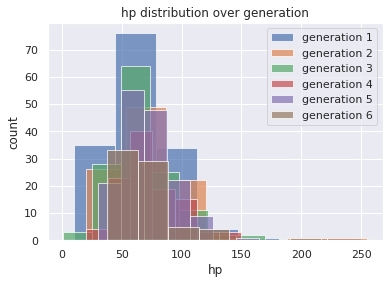

In [24]:
plot_grouped_box_hist(df2, 'hp', 'generation')

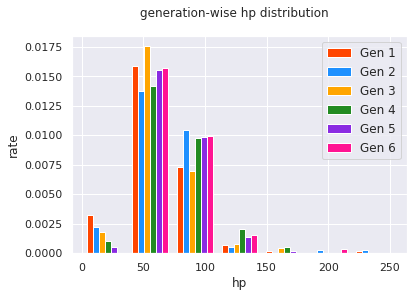

In [25]:
plot_sidebyside_hist('hp')

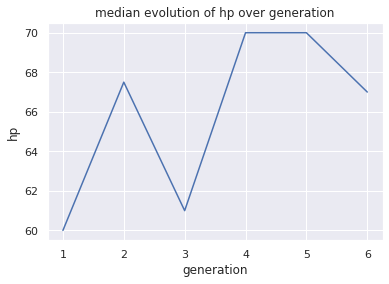

In [26]:
plot_med_growth_evol('hp')

#### Attack

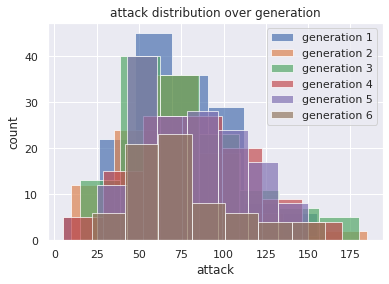

In [27]:
plot_grouped_box_hist(df2, 'attack', 'generation')

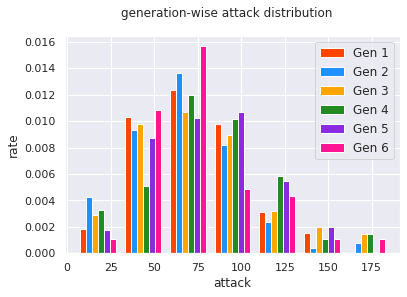

In [28]:
plot_sidebyside_hist('attack')

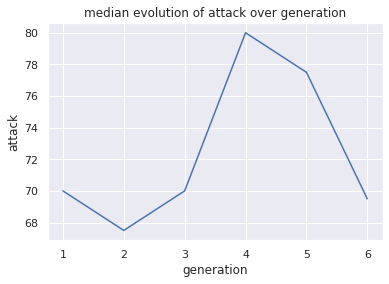

In [29]:
plot_med_growth_evol('attack')

#### Special Attack

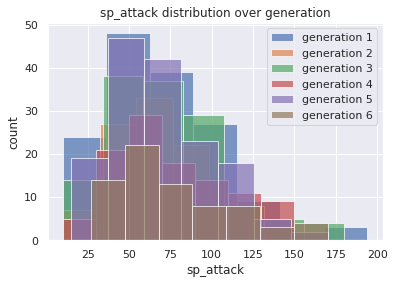

In [30]:
plot_grouped_box_hist(df, 'sp_attack', 'generation')

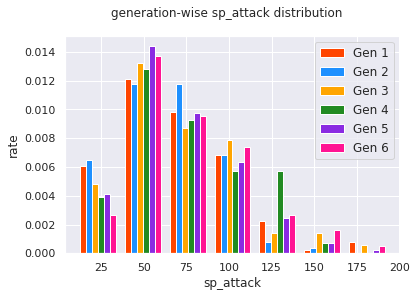

In [31]:
plot_sidebyside_hist('sp_attack')

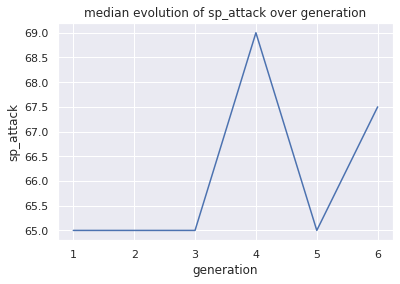

In [32]:
plot_med_growth_evol('sp_attack')

#### Defense

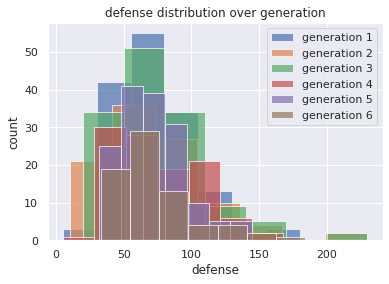

In [33]:
plot_grouped_box_hist(df, 'defense', 'generation')

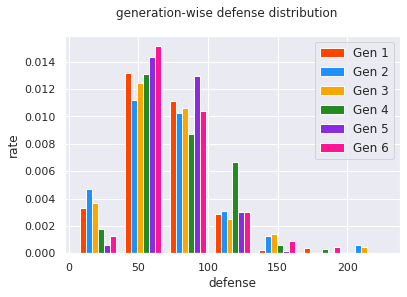

In [34]:
plot_sidebyside_hist('defense')

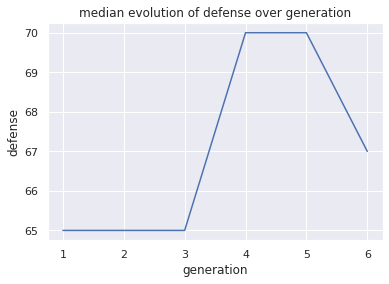

In [35]:
plot_med_growth_evol('defense')

#### Special Defense

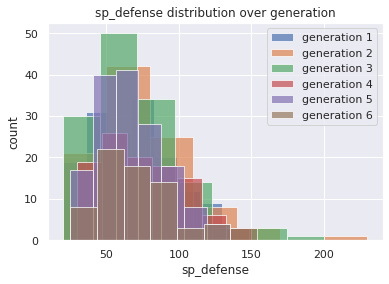

In [36]:
plot_grouped_box_hist(df, 'sp_defense', 'generation')

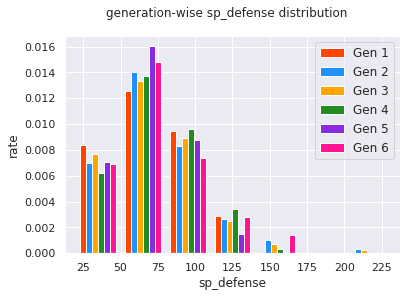

In [37]:
plot_sidebyside_hist('sp_defense')

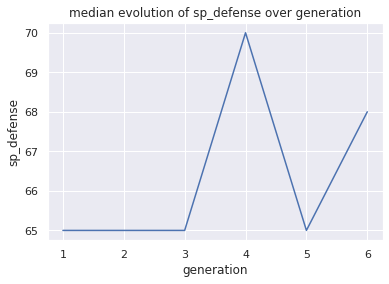

In [38]:
plot_med_growth_evol('sp_defense')

#### Speed

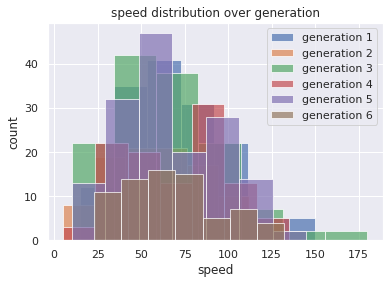

In [39]:
plot_grouped_box_hist(df, 'speed', 'generation')

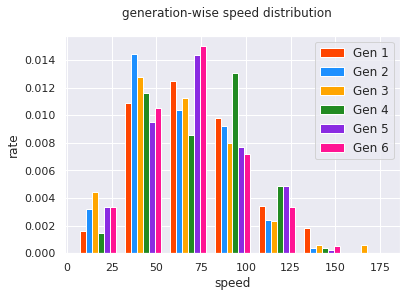

In [40]:
plot_sidebyside_hist('speed')

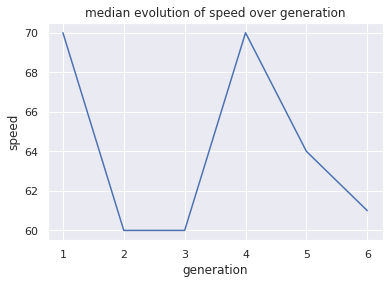

In [41]:
plot_med_growth_evol('speed')

#### Base_Total

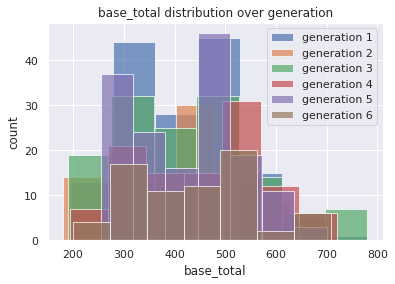

In [42]:
plot_grouped_box_hist(df, 'base_total', 'generation')

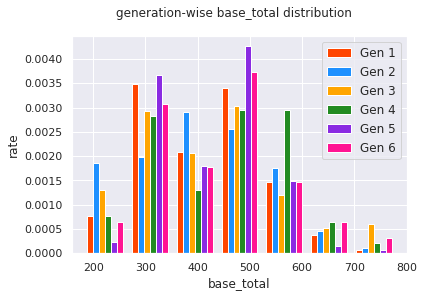

In [43]:
plot_sidebyside_hist('base_total')

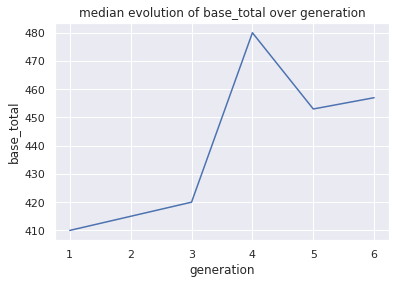

In [44]:
plot_med_growth_evol('base_total')

When we plot the median evolution of every feature over the generations, we observe a peak at generation 4 for every feature. 

#### Is_Legendary

In [45]:
# Used to find the number of legendary pokemon
def num_legendary(df):
  return df['is_legendary'].sum()

# Used to find the rate of legendary pokemon
def rate_legendary(df):
  return ('    ' + str(num_legendary(df)) + '       ' + str((num_legendary(df)/df['is_legendary'].count()).round(2)))

print('legendary count and rate of each generation, respectively:\n' + \
      'gen 1:  ' + rate_legendary(gen1), 'gen 2:  ' + rate_legendary(gen2),\
      'gen 3: ' + rate_legendary(gen3), 'gen 4: ' + rate_legendary(gen4),\
      'gen 5: ' + rate_legendary(gen5), 'gen 6:  ' + rate_legendary(gen6), sep='\n')

legendary count and rate of each generation, respectively:
gen 1:      5       0.03
gen 2:      6       0.06
gen 3:     10       0.07
gen 4:     13       0.12
gen 5:     13       0.08
gen 6:      6       0.08


The number of legendary pokemon is the highest in generations 4 and 5, while its percentage being the highest in generation 4. On the other hand, generation 1 contains the lowest number and percentage of legendary pokemon.

In [0]:
# Separate dataframe into legendary and non-legendary pokemon
df_legend = df2[df2['is_legendary']==1]
df_nonlegend = df2[df2['is_legendary']==0]
df_legend = df_legend.drop(columns=['is_legendary','generation','pokedex_number'])
df_nonlegend = df_nonlegend.drop(columns=['is_legendary','generation','pokedex_number'])

The histograms below demonstrate the difference in the stats of legendary (red) and non-legendary (blue) pokemon. There is clearly a difference in their distributions such that the stats of legendary pokemon are higher.

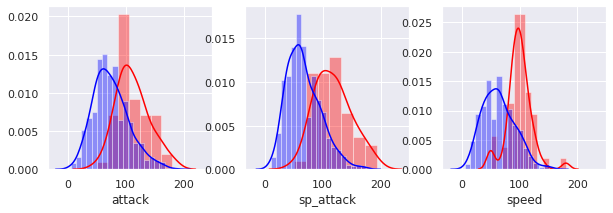

In [47]:
# Difference of features attack, sp_attack, speed, defense, sp_defense, and hp 
# for legendary (red) and non-legendary (blue) pokemon
f, axes = plt.subplots(1, 3, figsize=(10, 3), sharex=True)
sns.distplot( df_legend['attack'] , color="red", ax=axes[0])
sns.distplot( df_legend['sp_attack'] , color="red", ax=axes[1])
sns.distplot( df_legend['speed'] , color="red", ax=axes[2])
sns.distplot( df_nonlegend['attack'] , color="blue", ax=axes[0])
sns.distplot( df_nonlegend['sp_attack'] , color="blue", ax=axes[1])
sns.distplot( df_nonlegend['speed'] , color="blue", ax=axes[2])

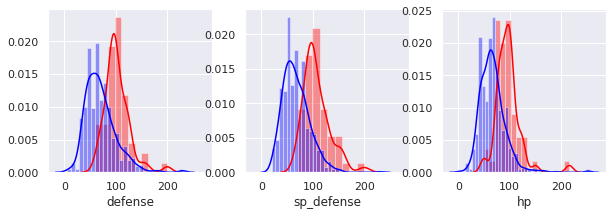

In [48]:
f, axes = plt.subplots(1, 3, figsize=(10, 3), sharex=True)
sns.distplot( df_legend['defense'] , color="red", ax=axes[0])
sns.distplot( df_legend['sp_defense'] , color="red", ax=axes[1])
sns.distplot( df_legend['hp'] , color="red", ax=axes[2]);
sns.distplot( df_nonlegend['defense'] , color="blue", ax=axes[0])
sns.distplot( df_nonlegend['sp_defense'] , color="blue", ax=axes[1])
sns.distplot( df_nonlegend['hp'] , color="blue", ax=axes[2]);

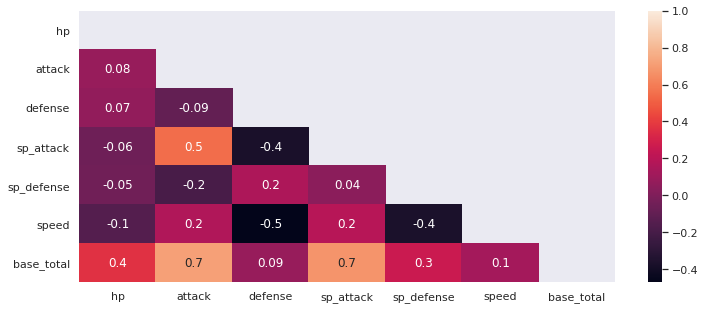

In [63]:
# Correlation heatmap of legendary pokemon stats
matrix = np.triu(df_legend.corr())
plt.figure(figsize = (12,5))
ax = sns.heatmap(df_legend.corr(), mask=matrix, annot=True, fmt='.1g');

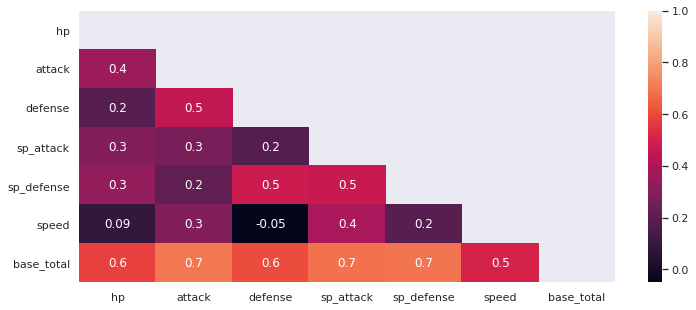

In [64]:
# Correlation heatmap of non-legendary pokemon stats
matrix = np.triu(df_nonlegend.corr())
plt.figure(figsize = (12,5))
ax = sns.heatmap(df_nonlegend.corr(), mask=matrix, annot=True, fmt='.1g');

We observe that non-legendary pokemon have a moderate positive correlation between sp_attack and sp_defense, while there is no such correlation in legendary pokemon. On the other hand, sp_attack and attack have a higher correlation in legendary pokemon.

#### Against_?

There are 18 against_? categories. 

In [49]:
df.columns[26:]

Index(['against_bug', 'against_dark', 'against_dragon', 'against_electric',
       'against_fairy', 'against_fight', 'against_fire', 'against_flying',
       'against_ghost', 'against_grass', 'against_ground', 'against_ice',
       'against_normal', 'against_poison', 'against_psychic', 'against_rock',
       'against_steel', 'against_water'],
      dtype='object')

In [0]:
# Create a column that holds the sum of all against_? features
df['sum_against'] = df.apply(lambda row: row.against_bug + row.against_dark + row.against_dragon +\
                   row.against_electric + row.against_fairy + row.against_fight + \
                   row.against_fire + row.against_flying + row.against_ghost + \
                   row.against_grass + row.against_ground + row.against_ice + \
                   row.against_normal + row.against_poison + row.against_psychic +\
                   row.against_rock + row.against_steel + row.against_water , axis=1)

We will use this value to get insight about which pokemon type gets the most damage in combat against all pokemon types combined. A higher sum_against value denotes a higher damage intake.

In [51]:
df.groupby(['type1'])['sum_against'].median().sort_values().head()

type1
steel       15.25
ghost       17.25
poison      17.50
electric    17.50
fairy       17.50
Name: sum_against, dtype: float64

The top 5 primary pokemon types that get the least amount of damage against all pokemon types are steel, ghost, poison, electric, and fairy.

In [52]:
df.groupby(['type2'])['sum_against'].median().sort_values().head()

type2
steel       16.000
ghost       17.000
normal      17.750
fairy       17.875
electric    18.000
Name: sum_against, dtype: float64

The top 5 secondary pokemon types that get the least amount of damage against all pokemon types are steel, ghost, normal, fairy, and electric.

In [53]:
df.groupby(['type1', 'type2'])['sum_against'].median().sort_values().head()

type1  type2 
steel  fairy     13.25
       flying    13.50
       dragon    14.25
       ghost     14.25
water  steel     14.50
Name: sum_against, dtype: float64

The top 5 combined pokemon types with the least damage-intake against all pokemon types are steel-fairy, steel-flying, steel-dragon, steel-ghost, and water-steel. This shows that steel-type pokemon get the least amount of damage from other pokemon due to their type.

In [54]:
df[['name', 'type1', 'type2', 'sum_against', 'is_legendary']].sort_values(by=['sum_against']).head(10)

,name,type1,type2,sum_against,is_legendary
302,Mawile,steel,fairy,13.25,0
706,Klefki,steel,fairy,13.25,0
226,Skarmory,steel,flying,13.50,0
482,Dialga,steel,dragon,14.25,1
678,Honedge,steel,ghost,14.25,0
680,Aegislash,steel,ghost,14.25,0
679,Doublade,steel,ghost,14.25,0
394,Empoleon,water,steel,14.50,0
378,Registeel,steel,NaN,15.00,1
599,Klang,steel,NaN,15.00,0


In [55]:
print('Percentage of legendary pokemon in the top 10 pokemon with the least damage-intake: 20%')

Percentage of legendary pokemon in the top 10 pokemon with the least damage-intake: 20%


Two of the top ten pokemon with the least damage-intake are legendary, i.e. Dialga and Registeel.

In [56]:
legend_percent = df[df['is_legendary']==1]['pokedex_number'].count()/df['pokedex_number'].count()*100
print('Percentage of legendary pokemon: ' + str(legend_percent) + '%')

Percentage of legendary pokemon: 7.350901525658807%


Only 7% of all pokemon in the first 6 generations are legendary. The 20% legendary ratio in the table of pokemon with least amount of damage-intake has almost three-fold the ratio of all pokemon.

In [57]:
df.groupby(['generation'])['sum_against'].median().sort_values().head(10)

generation
1    18.0
2    18.0
4    18.5
3    19.0
5    19.0
6    19.0
Name: sum_against, dtype: float64

The median damage-intake of pokemon has steadily increased as the generations progressed.

### Feature-group 3

1. If any of your features need preprocessing, preprocess it. 

2. Plot the distribution (i.e. histogram / bar chart ) of each feature. 

3. Plot scatterplots between meaningful pairs of features to identify any possible correlation. Also compute the correlation coefficients (Pearson and Spearman). 

4. Also consider any possible correlations that could occur between your set of features and the features from other groups.

5. EXPLAIN WHY FOR EACH OF THESE COMPUTATIONS

	•	base_happiness: Base Happiness of the Pokemon
	•	Color. Color of the Pokémon according to the Pokédex.
	•	hasGender. Boolean that indicates if the Pokémon can be classified as female or male.
	•	EggGroup1. Egg Group of the Pokémon.
	•	EggGroup2. Second Egg Group of the Pokémon, in case it has two.
	•	baseeggsteps: The number of steps required to hatch an egg of the Pokemon
	•	hasMegaEvolution. Boolean that indicates whether the Pokémon is able to Mega-evolve or not.
	•	Body_Style. Body Style of the Pokémon according to the Pokédex.


In [0]:
data = pd.read_csv("data/full_data_pkm.csv", sep=';')

In [0]:
happiness = data['base_happiness']
color = data['Color']
gender = data['hasGender']
egg1 = data['Egg_Group_1']
egg2 = data['Egg_Group_2']
egg_step = data['base_egg_steps']
mega = data['hasMegaEvolution']
body = data['Body_Style']
legendary = data['is_legendary']

def count(data):
    content = []
    count=[]
    
    for i in data:
        new_content = True
        content_id=0
        for j in content:
            if i==j:
                new_content=False
                count[content_id]+=1
            content_id+=1
        if new_content and not pd.isnull(i):
            content.append(i)
            count.append(1)
            
    return content, count

def true_false_count(data):
    content = [True, False]
    count=[0, 0]
    
    for i in data:
        if i == True:
            count[0]+=1
        elif i == False:
            count[1]+=1
    
    return content, count

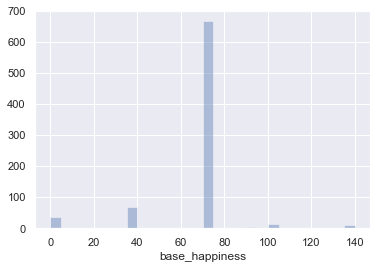

In [0]:
sns.distplot(happiness, kde=False)

<BarContainer object of 10 artists>

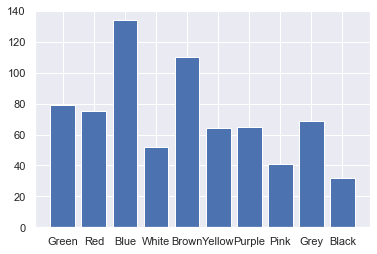

In [0]:
pok_colors, color_count = count(color)        

plt.bar(pok_colors, color_count)

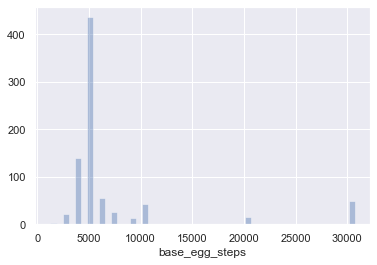

In [0]:
sns.distplot(egg_step, kde=False);

<BarContainer object of 13 artists>

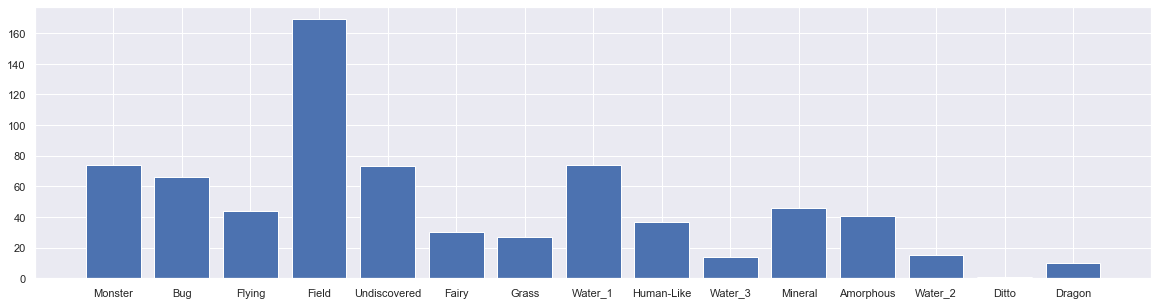

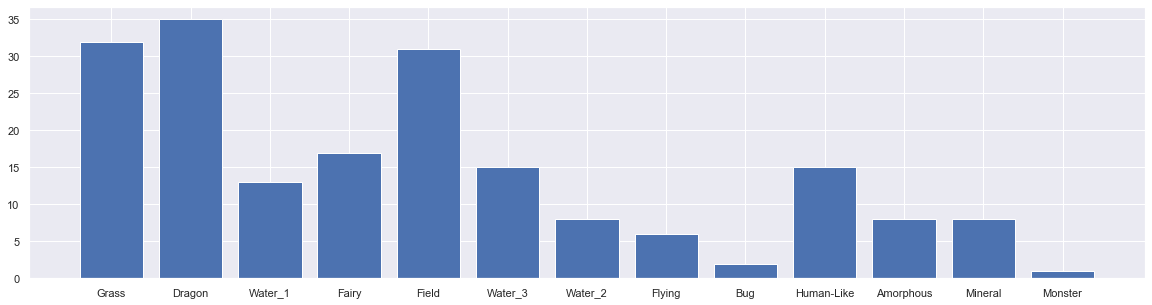

In [0]:
egg_types, egg_count = count(egg1)

plt.figure( figsize=(20, 5))
plt.bar(egg_types, egg_count)

egg_types2, egg_count2 = count(egg2)
plt.figure( figsize=(20, 5))
plt.bar(egg_types2, egg_count2)

<BarContainer object of 14 artists>

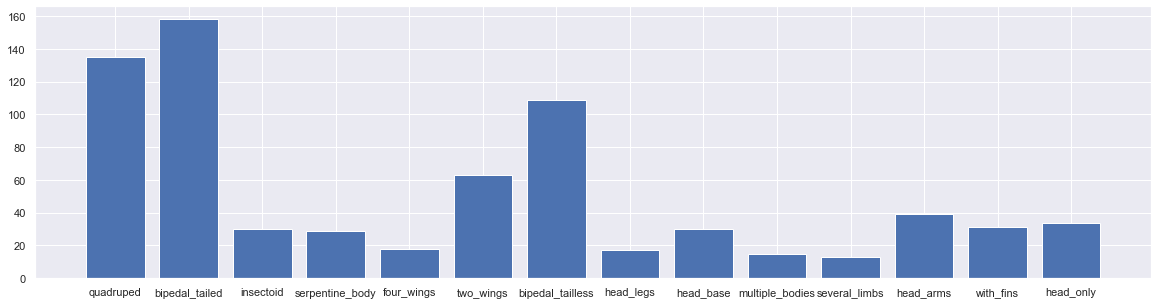

In [0]:
body_st, body_count = count(body)
plt.figure( figsize=(20, 5))
plt.bar(body_st, body_count)

<BarContainer object of 2 artists>

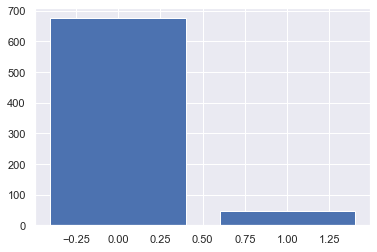

In [0]:
data_mega_f = data[data.hasMegaEvolution == False]
data_mega_t = data[data.hasMegaEvolution == True]

mega_t_f, mega_count = true_false_count(mega)
plt.bar(mega_t_f, mega_count)

<BarContainer object of 2 artists>

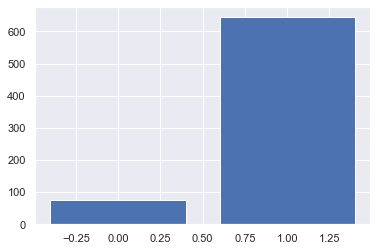

In [0]:
data_gender_f = data[data.hasGender==False]
data_gender_t = data[data.hasGender==True]

gender_t_f, gender_count = true_false_count(gender)
plt.bar(gender_t_f, gender_count)

<BarContainer object of 2 artists>

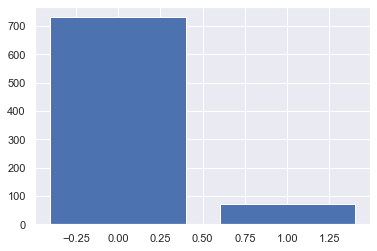

In [0]:
legend_f = data[data.is_legendary == False]
legend_t = data[data.is_legendary == True]

legend_t_f, legend_count = true_false_count(legendary)
plt.bar(legend_t_f, legend_count)

<BarContainer object of 10 artists>

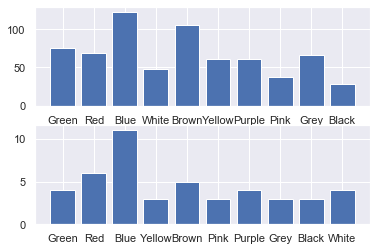

In [0]:
#relation between color and mega evolution

color_mega_f = data_mega_f['Color']
color_mega_t = data_mega_t['Color']

colf, couf = count(color_mega_f)
colt, cout = count(color_mega_t)

fig, axs = plt.subplots(2)
axs[0].bar(colf, couf)
axs[1].bar(colt, cout)

<BarContainer object of 10 artists>

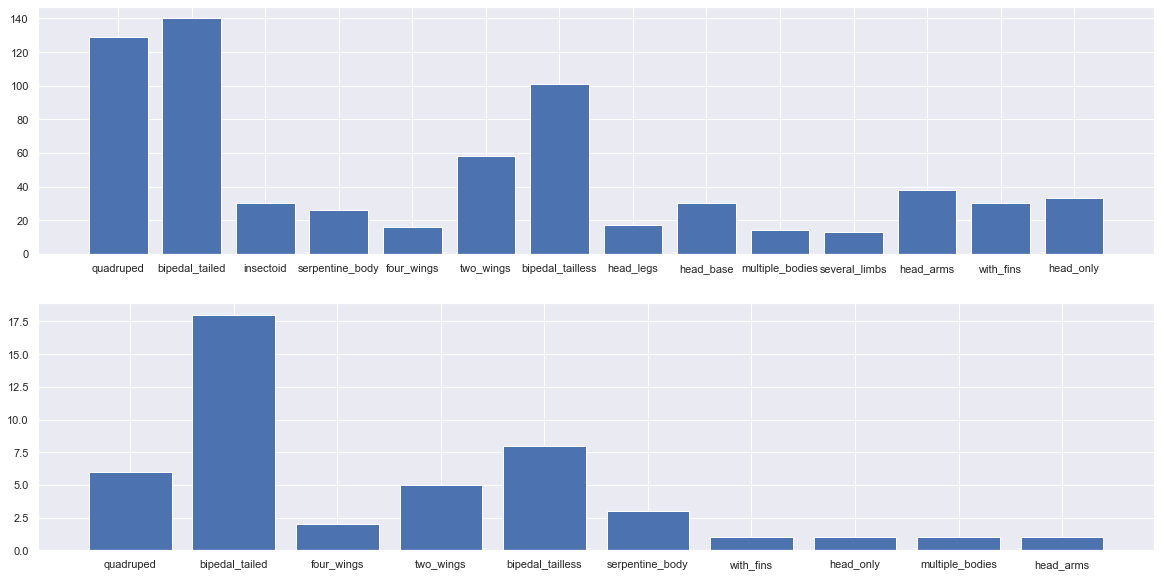

In [0]:
#relation between body type and mega evolution

body_mega_f = data_mega_f['Body_Style']
body_mega_t = data_mega_t['Body_Style']

colf, couf = count(body_mega_f)
colt, cout = count(body_mega_t)

fig, axs = plt.subplots(2, figsize=(20, 10))
axs[0].bar(colf, couf)
axs[1].bar(colt, cout)


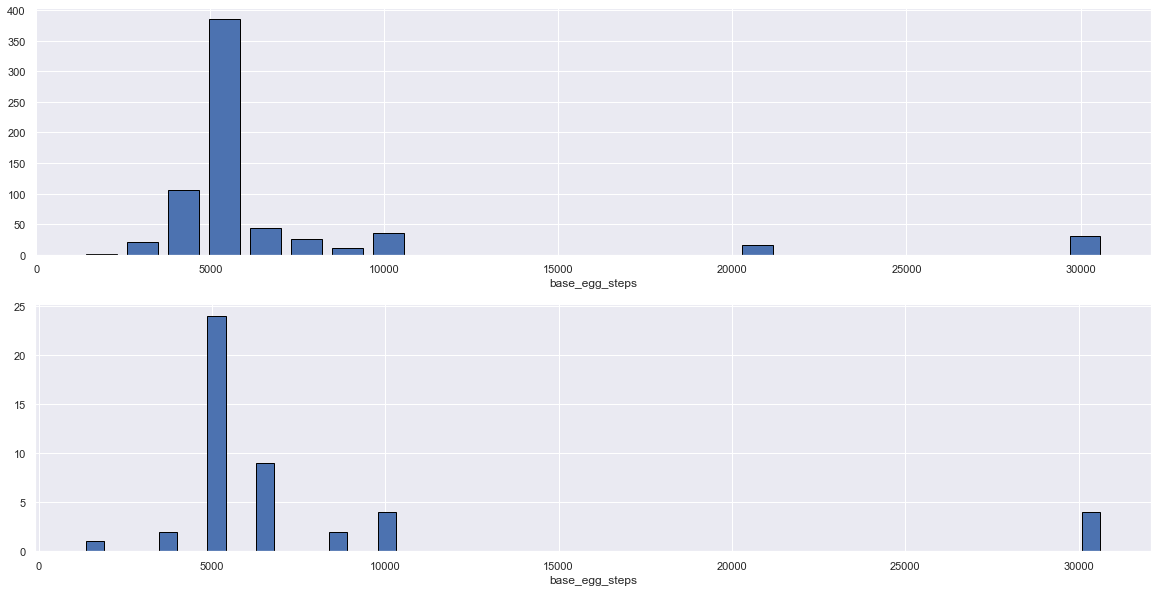

In [0]:
#relation between base egg steps ang mega evolution
egg_step_mega_f = data_mega_f['base_egg_steps']
egg_step_mega_t = data_mega_t['base_egg_steps']



fig, axs = plt.subplots(2, figsize=(20, 10))
sns.distplot(egg_step_mega_f, kde=False, ax=axs[0],hist_kws={"rwidth":0.75,'edgecolor':'black', 'alpha':1.0});
sns.distplot(egg_step_mega_t, kde=False, ax=axs[1],hist_kws={"rwidth":0.75,'edgecolor':'black', 'alpha':1.0});

<BarContainer object of 2 artists>

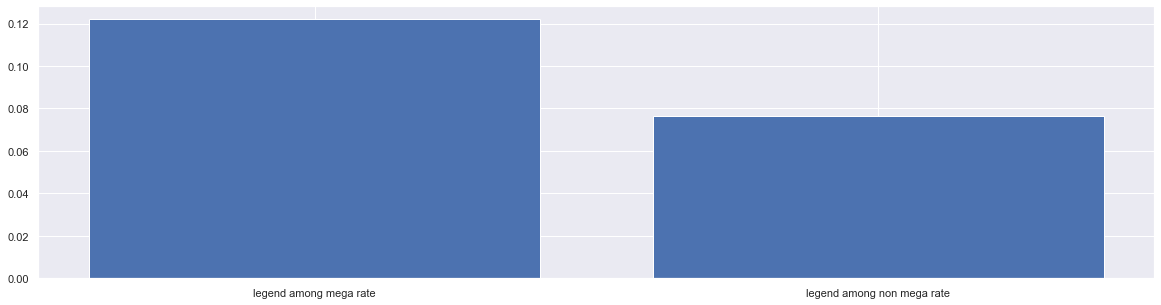

In [0]:
#relation between being legendary and having mega evolution

mega_and_legend = data_mega_t[data_mega_t.is_legendary == True]
mega_not_legend = data_mega_t[data_mega_t.is_legendary == False]
not_mega_but_legend = data_mega_f[data_mega_f.is_legendary == True]
not_mega_not_legend = data_mega_f[data_mega_f.is_legendary == False]
a=mega_and_legend.shape[0]
b=mega_not_legend.shape[0]
c=not_mega_but_legend.shape[0]
d=not_mega_not_legend.shape[0]
e=[a/b, c/d]
f=["legend among mega rate", "legend among non mega rate"]
plt.figure( figsize=(20, 5))
plt.bar(f, e)


<BarContainer object of 15 artists>

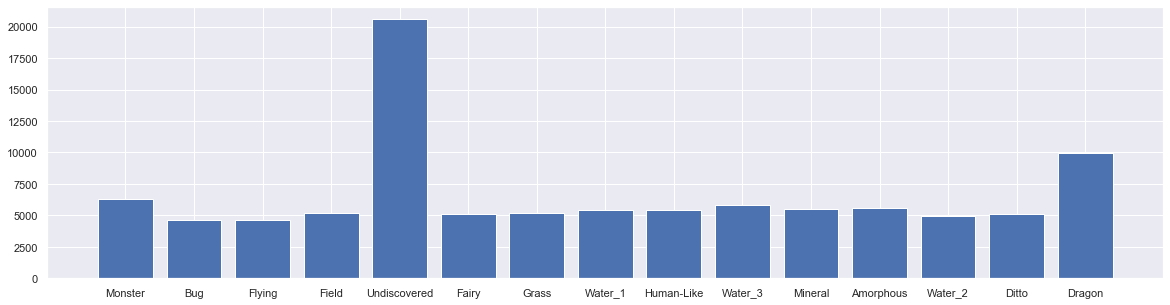

In [0]:
#relation between egg type and base egg steps
def count_steps(egg_types, egg_count, egg_types2, egg_count2):
    averages=np.zeros(len(egg_types1))
    n=0
    tot_egg_count=egg_count1
    for i in egg_types1:
        for j in range(len(data)):
            if egg1[j] == i:
                averages[n]+=egg_step[j]
            if egg2[j] == j:
                averages[n]+=egg_step[j]
                tot_egg_count[n]+=1
        n+=1
    averages= averages/tot_egg_count
    
    return averages

egg_types1, egg_count1 = count(egg1)
egg_types2, egg_count2 = count(egg2)

avg_steps_for_egg_types = count_steps(egg_types1, egg_count1, egg_types2, egg_count2)
plt.figure( figsize=(20, 5))
plt.bar(egg_types1, avg_steps_for_egg_types)

[52, 1]

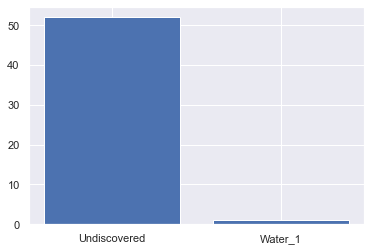

In [0]:
undiscovered = data[data.Egg_Group_1=="Undiscovered"]
legendary_undiscovered = undiscovered[undiscovered.is_legendary==True]

dragon1 = data[data.Egg_Group_1=="Dragon"]
dragon2 = data[data.Egg_Group_2=="Dragon"]
dragon1.append(dragon2)
legendary_dragons = dragon1[dragon1.is_legendary==True]


legendary_eggs, legendary_eggs_count = count(data[data.is_legendary==True]['Egg_Group_1'])

plt.bar(legendary_eggs, legendary_eggs_count)
legendary_eggs_count
#among legendaries 53 lay eggs and 52 of them are of the undiscovered type meaning that they can't breed... 
#but their eggs can still be found around

In [0]:

water1 = data[data.Egg_Group_1=="Water_1"]
water1_legendary = water1[water1.is_legendary==True]
water1_legendary
#only one legendary pokemon can breed, its egg's type are water1 and fairy

,pokedex_number,name,type1,type2,hp,defense,attack,sp_defense,sp_attack,speed,...,against_rock,against_steel,against_water,abilities,ability 1,ability 2,ability 3,ability 4,ability 5,ability 6
489,490,Manaphy,water,NaN,100,100,100,100,100,100,...,1.0,0.5,0.5,['Hydration'],Hydration,NaN,NaN,NaN,NaN,NaN


## Related Work

**What others have already done with the data?**
*   Interactive tables where the user can sort pokemon with respect to a specific stat. 
*   Table showing average stats for each pokemon type.
*   Table showing number of available moves to be learned by each (combined) type.
*   Plot showing average speed, attack/defense, and special attack/special defense by pokemon type.
*   Correlation heatmap of stats.
*   Attack vs. defense plot of individual pokemon.
*   Special attack vs. special defense of individual pokemon.



https://medium.com/dataregressed/data-visualization-with-tableau-pokémon-ec2a82242f8b 
https://medium.com/dataregressed/statistical-analysis-with-python-pokémon-1a72dd0451e1


Others have already visualized the distribution of pokemon features and extracted the correlations between them.

* Why is your approach original?

Our approach is original because we combine all of the features available in datasets to create a holistic guide to Pokemon. Our visualization plan consists of 4 main parts:

1.   Statistics of variables per generation: To the best of our knowledge, previous work on this dataset does not analyze pokemon grouped by their generation. With this part, we aim to visualize the changes in stats of pokemon over generations with an interactive interface where they will be able to observe the change in stats over generations by dragging a slider.

2.   Individual pokemon stats per generation:

3.   Bipartite graph of stats:

4.   "Cook" your own pokemon:



 introduce the concept of "cooking" the user's pokemon from the criteria that they specify. 



The idea is to give the user a number of features that they would like their pokemon to have, such as the generation, color, type, and body-type, and we will recommend them a list of pokemon with the best stats that fit their criteria. For example, the user may ask for a green generation 1 grass pokemon with a quadruped body-type. In this case, we would list Venusaur in our recommendation since it fits all the criteria and has high stats.

* What source of inspiration do you take? Visualizations that you found on other websites or magazines (might be unrelated to your data).


* In case you are using a dataset that you have already explored in another context (ML or ADA course, semester project...), you are required to share the report of that work to outline the differences with the submission for this class.

This does not apply to our project.